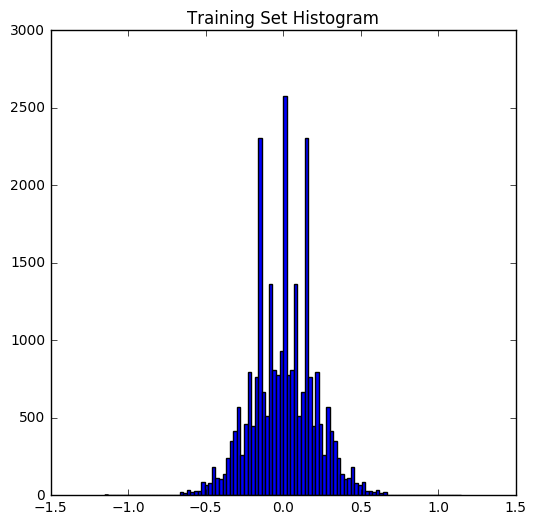

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from data import load_samples

# Visualizations will be shown in the notebook.
%matplotlib inline

samples = load_samples("data")

steerings = np.asarray(samples)[:,1].astype(float)

fig = plt.figure(figsize=(6,6))
a=fig.add_subplot(1,1,1)
a.hist(steerings, 100, normed=0)
a.set_title("Training Set Histogram")
plt.show()

Using TensorFlow backend.


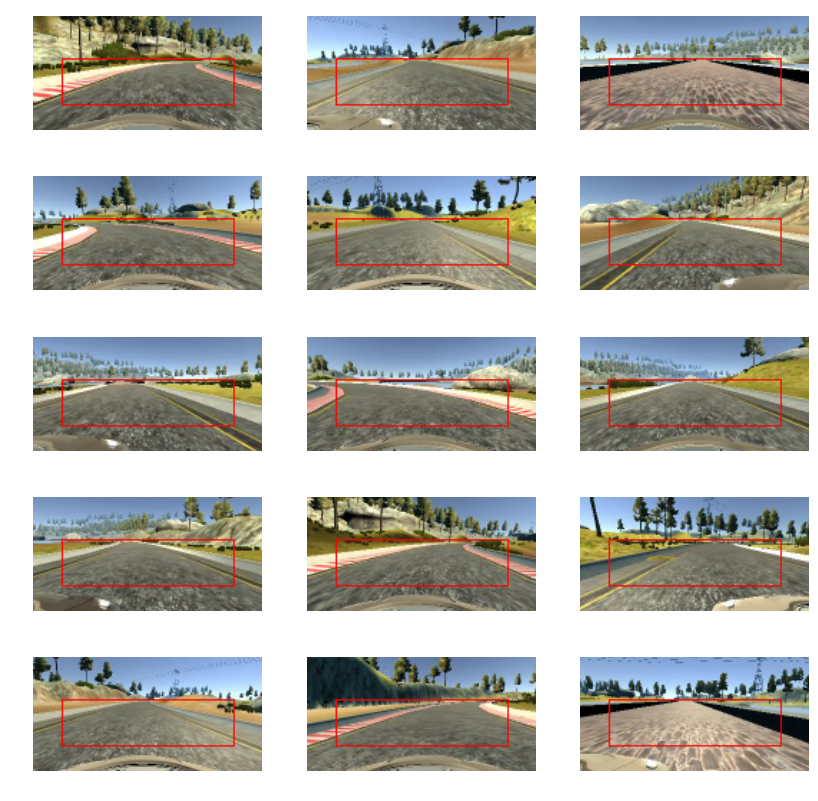

In [2]:
from model import generator
from model import preprocess_image
from model import crop_height as cropy
from model import crop_width as cropx
from model import image_shape
from model import pimage_shape
from model import cimage_shape


h, w, c = pimage_shape

vertices = np.array([[(cropx[0], cropy[0]), 
                      (w - cropx[1], cropy[0]), 
                      (w - cropx[1], h - cropy[1]), 
                      (cropx[0], h - cropy[1])]], dtype=np.int32)

def plot_image(image, ax):
    y, x, c = image.shape
    ax.set_axis_off()
    if c == 1:
        imgplot = ax.imshow(image.reshape(y,x), cmap='gray')          
    elif c == 3:
        img = preprocess_image(image)
         
        img = cv2.polylines(img, 
                            vertices, 
                            True, [0,0,255], 1)
 
        imgplot = ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        raise(ValueError("Image must have 1 or 3 colors"))
    return imgplot

def plot_random_images(images, images2=None):
    fig, axes = plt.subplots(5,3, figsize=(10,10))
    
    for i , ax in enumerate(axes.flat):
        plot_image(random.choice(images), ax)
        
    plt.show()

for X_batch, y_batch in generator(samples, "data", 1000):
    plot_random_images(X_batch)
    break